# Numerical Prediction using Tree-based Methods

#### Description:

This codebook covers how to use tree-based machine learning methods to make a numerical prediction.

#### Skill level:

- Beginner

-------------------------
### Import the required libraries

In [1]:
import os
import sys

platform_path = os.path.abspath(os.path.join(os.path.abspath(''), '../../../'))
sys.path.append(platform_path)

In [2]:
import HELPERS.machine_learning.model_evaluation as me
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

-------------------------
### Read data into a dataframe

In [3]:
df_raw = pd.read_csv(os.path.join(platform_path, 'DATA/boston.txt'))

-------------------------
### Check shape and head of the dataframe

In [4]:
df_raw.shape

(506, 14)

In [5]:
df_raw.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


-------------------------
### Separate features from the label

In [6]:
X_all = df_raw.drop('MDEV', axis=1)

In [7]:
y_true_all = df_raw[['MDEV']].values

-------------------------
### Make a split between training and test sets of data

In [8]:
X_train, X_test, y_true_train, y_true_test = train_test_split(X_all, y_true_all, test_size=0.3)

-------------------------
### Fit a decision tree regressor

In [9]:
clf = DecisionTreeRegressor()

clf.fit(X_train, y_true_train)

DecisionTreeRegressor()

-------------------------
### Generate predictions using the fitted model

In [10]:
y_pred_train = clf.predict(X_train.values)
y_pred_test = clf.predict(X_test.values)

-------------------------
### Check predictions against actuals

In [11]:
df_pred_test = pd.DataFrame(y_true_test, columns=['MDEV'])

df_pred_test['MDEV_pred'] = y_pred_test

In [12]:
df_pred_test.head()

,MDEV,MDEV_pred
0,23.2,17.8
1,36.1,36.2
2,24.7,23.1
3,28.6,28.7
4,20.6,23.3


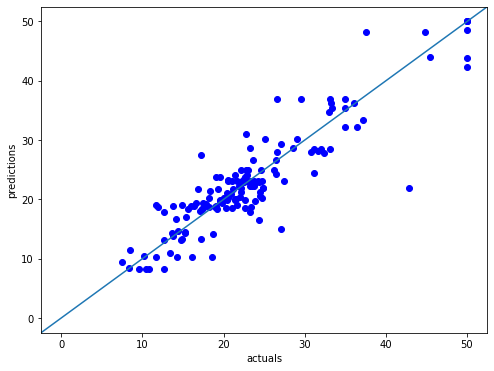

In [13]:
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(x=y_true_test, y=y_pred_test, color='b')
ax.axline([0, 0], [1, 1])

plt.xlabel('actuals')
plt.ylabel('predictions')
plt.show()

-------------------------
### Get model performance metrics

In [14]:
me.get_regression_metrics(y_true_train, y_pred_train)

mean_squared_error 0.0
explained_variance_score 1.0
mean_absolute_error 0.0
mean_squared_error 0.0
median_absolute_error 0.0
r2_score 1.0


In [15]:
me.get_regression_metrics(y_true_test, y_pred_test)

mean_squared_error 14.9449
explained_variance_score 0.8105
mean_absolute_error 2.6572
mean_squared_error 14.9449
median_absolute_error 2.0
r2_score 0.8102


-------------------------
### Inspect part of the tree for fitted model

[Text(145.37383696737683, 212.004, 'X[12] <= 9.725\nmse = 86.62\nsamples = 354\nvalue = 22.261'),
 Text(89.2911451398136, 201.132, 'X[5] <= 7.437\nmse = 79.415\nsamples = 138\nvalue = 30.181'),
 Text(57.26372836218376, 190.26, 'X[7] <= 1.557\nmse = 39.168\nsamples = 116\nvalue = 27.437'),
 Text(56.31267643142477, 179.388, 'mse = 0.0\nsamples = 3\nvalue = 50.0'),
 Text(58.21478029294275, 179.388, 'X[5] <= 6.803\nmse = 26.333\nsamples = 113\nvalue = 26.838'),
 Text(22.75094540612517, 168.516, 'X[9] <= 222.5\nmse = 12.596\nsamples = 80\nvalue = 24.549'),
 Text(4.7552596537949405, 157.644, 'X[6] <= 60.45\nmse = 8.398\nsamples = 5\nvalue = 31.18'),
 Text(2.853155792276964, 146.772, 'X[1] <= 61.5\nmse = 0.549\nsamples = 3\nvalue = 29.067'),
 Text(1.9021038615179762, 135.9, 'X[6] <= 58.4\nmse = 0.023\nsamples = 2\nvalue = 28.55'),
 Text(0.9510519307589881, 125.02799999999999, 'mse = 0.0\nsamples = 1\nvalue = 28.4')]

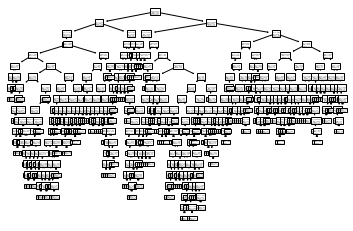

In [16]:
plot_tree(clf)[:10]

-------------------------
### Fit a random forest regressor

In [17]:
clf = RandomForestRegressor()

clf.fit(X_train, y_true_train)

<ipython-input-17-390f9a4a6ff2>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_true_train)


RandomForestRegressor()

-------------------------
### Generate predictions using the fitted model

In [18]:
y_pred_train = clf.predict(X_train.values)
y_pred_test = clf.predict(X_test.values)

-------------------------
### Get model performance metrics

In [19]:
me.get_regression_metrics(y_true_train, y_pred_train)

mean_squared_error 1.8705
explained_variance_score 0.9784
mean_absolute_error 0.8736
mean_squared_error 1.8705
median_absolute_error 0.5885
r2_score 0.9784


In [20]:
me.get_regression_metrics(y_true_test, y_pred_test)

mean_squared_error 8.7008
explained_variance_score 0.8899
mean_absolute_error 1.9833
mean_squared_error 8.7008
median_absolute_error 1.493
r2_score 0.8895


-------------------------
### Fit an extra trees regressor

In [21]:
clf = ExtraTreesRegressor()

clf.fit(X_train, y_true_train)

<ipython-input-21-b296cd7a659b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_true_train)


ExtraTreesRegressor()

-------------------------
### Generate predictions using the fitted model

In [22]:
y_pred_train = clf.predict(X_train.values)
y_pred_test = clf.predict(X_test.values)

-------------------------
### Get model performance metrics

In [23]:
me.get_regression_metrics(y_true_train, y_pred_train)

mean_squared_error 0.0
explained_variance_score 1.0
mean_absolute_error 0.0001
mean_squared_error 0.0
median_absolute_error 0.0
r2_score 1.0


In [24]:
me.get_regression_metrics(y_true_test, y_pred_test)

mean_squared_error 10.8402
explained_variance_score 0.8626
mean_absolute_error 1.9464
mean_squared_error 10.8402
median_absolute_error 1.318
r2_score 0.8623
